<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/%ED%94%BC%EB%A7%88_%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 분석

In [ ]:
# pandas 라이브러리를 불러오기
import pandas as pd

# 불러온 데이터셋을 적용한다. 이 때 각 컬럼에 해당하는 이름을 지정한다. (헤더가 없기 때문)
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [ ]:
# 처음 5줄을 출력.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [ ]:
# 데이터의 전반적인 정보를 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# 각 정보별 특징을 좀더 자세히 출력한다.
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
# 데이터 중 임신 정보와 클래스 만을 출력한다.
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [ ]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

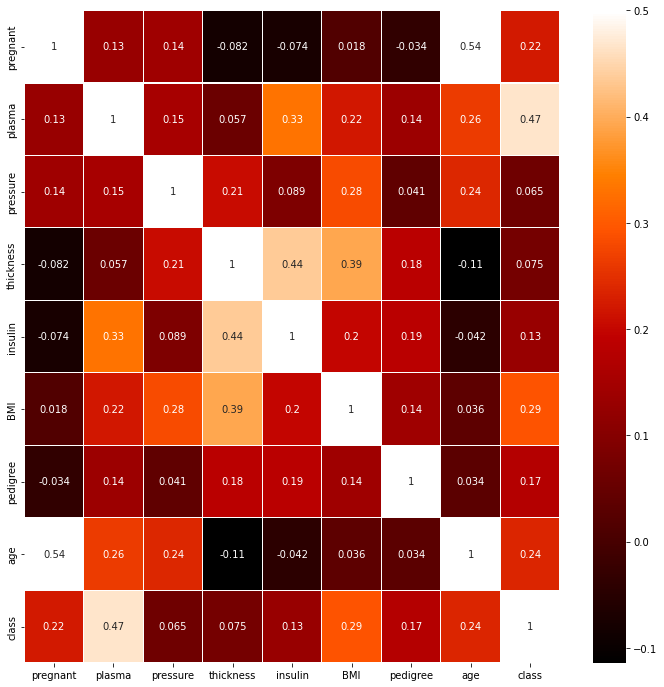

In [ ]:
# 데이터 간의 상관관계를 그래프로 표현

colormap = plt.cm.gist_heat   #그래프의 색상 구성 정하기
plt.figure(figsize=(12,12))   #그래프의 크기 정하기

# 그래프의 속성을 결정. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 한다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

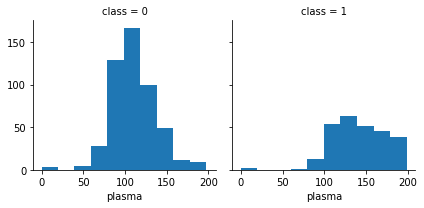

In [ ]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()


딥러닝

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

In [ ]:
# seed 값 생성
numpy.random.seed(3)
tf.random.set_seed(3)

In [ ]:
# 데이터 로드
dataset = numpy.loadtxt("../dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size = 10)

#결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X, Y)[1])) # model.evaluate - 모델 평가하기

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11